In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from PIL import ImageEnhance
from htgCrap import htgCrap
import cv2
import matplotlib.pyplot as plt
import os
import paddle as paddle
import paddle.fluid as fluid
import PIL.Image as Image
import random
import numpy as np
import time
from htgCrap import htgCrap
from PIL import ImageEnhance

In [22]:
image_path = 'data/English/Hnd/Img/Sample049/'
save_path = 'data/temp/tmp17/'
image_list = os.listdir(image_path)
for imp in image_list:
    imp = image_path+imp
    htgTool = htgCrap(np.array(Image.open(imp)))
    image = np.array(htgTool.crapNumber(64)).reshape(64,64)
    image_father = cv2.bitwise_not(image)
    dilate_list = [1,3,5,7]
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for dl in dilate_list:
        element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (dl, dl))
        imc = cv2.dilate(image_father, element1, iterations = 1)
        imc = cv2.bitwise_not(imc)
        cv2.imwrite(save_path+'t'+str(len(os.listdir(save_path)))+'.jpg',imc)

In [23]:
def show_position_image(path,pz_level,pz_height,area_size=1000):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobel1 = cv2.Sobel(gray,cv2.CV_8U, 0, 1, ksize=1)
    sobel2 = cv2.Sobel(gray,cv2.CV_8U, 1, 0, ksize=1)
    sobel = sobel1+sobel2
    ret, binary = cv2.threshold(sobel, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
    element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (pz_level, pz_height))
    dilation = cv2.dilate(binary, element1, iterations = 1)
    region = []
    _,contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    pinjun = []
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv2.contourArea(cnt)
        if area<area_size:
            continue
        rect = cv2.boundingRect(cnt)
        x = int(rect[0])
        y = int(rect[1])
        length = int(rect[2])
        height = int(rect[3])
        box = [y,y+height,x,x+length]
        region.append(box)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    cv2.namedWindow("img", cv2.WINDOW_NORMAL)
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def del_fuhao(path,newPath,pz_level,pz_height,area_size=1000,dl=1):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobel1 = cv2.Sobel(gray,cv2.CV_8U, 0, 1, ksize=1)
    sobel2 = cv2.Sobel(gray,cv2.CV_8U, 1, 0, ksize=1)
    sobel = sobel1+sobel2
    ret, binary = cv2.threshold(sobel, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)
    element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (pz_level, pz_height))
    dilation = cv2.dilate(binary, element1, iterations = 1)
    region = []
    _,contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if not os.path.exists(newPath):
        os.makedirs(newPath)
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv2.contourArea(cnt)
        if area<area_size:
            continue
        rect = cv2.boundingRect(cnt)
        x = int(rect[0])
        y = int(rect[1])
        length = int(rect[2])
        height = int(rect[3])
        box = [y,y+height,x,x+length]
        region.append(box)
    for box in region:
        tmp_image = img[box[0]:box[1],box[2]:box[3]]
        gray = cv2.cvtColor(tmp_image, cv2.COLOR_BGR2GRAY)
        ret, binary = cv2.threshold(tmp_image, 120, 255,cv2.THRESH_BINARY_INV)
        if os.path.exists(newPath) == False:
            os.makedirs(newPath)
        oslen = os.listdir(newPath)
        maxNumber = len(os.listdir(newPath))
        binary = cv2.resize(binary,(64,64))
        element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (dl,dl ))
        imc = cv2.erode(binary, element1, iterations = 1)
        cv2.imwrite(newPath+'t'+str(maxNumber)+'.jpg',imc)

In [25]:
image_path = 'data/English/Hnd/Img/Sample015/'
save_number = 8
for image_name in os.listdir(image_path):
    ip = image_path+image_name
    save_path = 'data/temp/tmp'+str(save_number)+'/'
    dllist = [1,3,5,8]
    for dli in dllist:
        del_fuhao(ip,save_path,100,100,dl=dli)

In [24]:
image_path = 'images/wjf/4.jpg'
save_number = 15
save_path = 'data/temp/'+str(save_number)+'/'
del_fuhao(image_path,save_path,30,40)

In [73]:
##更改名字
image_path = 'data/temp/4/'
imlist = os.listdir(image_path)
cout=0
for imname in imlist:
    imp = image_path+imname
    os.rename(imp,image_path+'re'+str(cout)+'.jpg')
    cout+=1

In [6]:
def getDataArray(path):
    class_list = os.listdir(path)
    total_list = []
    for clas in range(len(class_list)):
        class_path = path+str(clas)+'/'
        num_list = []
        for num in os.listdir(class_path):
            num_path = class_path+num
            image = np.array(Image.open(num_path).resize((64,64)).convert('L'))
            _, image = cv2.threshold(image, 10, 255,cv2.THRESH_BINARY)
            num_list.append(image)
        total_list.append(num_list)
    return np.array(total_list)

def createTrainTestData(total_data):
    total_len = len(total_data)
    train_list = [[]*1 for i in range(total_len)]
    test_list = [[]*1 for i in range(total_len)]
    for class_index in range(total_len):
        class_data = total_data[class_index]
        random.shuffle(class_data)
        class_len = len(class_data)
        train_num = int(class_len*0.8)
        train_list[class_index]=class_data[:train_num]
        test_list[class_index]=class_data[train_num:]
    return np.array(train_list),np.array(test_list)

In [10]:
data_array = getDataArray('data/Unk_yange/')

In [11]:
train_list,test_list = createTrainTestData(data_array)

In [12]:
np.save('data/Unk_y_train_list',train_list)
np.save('data/Unk_y_test_list',test_list)

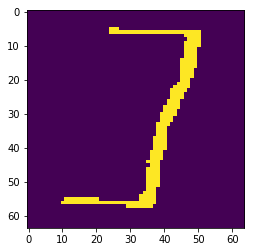

In [12]:
plt.imshow(train_list[18][0])